In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [2]:
강원 = pd.read_csv('C:/Users/user/Desktop/교통사고/빅데이터인턴분석자료통합버전_강원.csv', encoding='CP949')

In [3]:
강원.shape

(41121, 58)

In [4]:
강원.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41121 entries, 0 to 41120
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사고번호          41121 non-null  int64 
 1   발생일시          41121 non-null  int64 
 2   발생지_시도        41121 non-null  object
 3   발생지_시군구       41121 non-null  object
 4   법정동코드         41121 non-null  int64 
 5   요일            41121 non-null  object
 6   주야            41121 non-null  object
 7   사고내용          41121 non-null  object
 8   사고유형_대분류      41121 non-null  object
 9   사고유형_중분류      41121 non-null  object
 10  사고유형          41121 non-null  object
 11  가해자성별         41121 non-null  object
 12  피해자성별         41121 non-null  object
 13  연령가해자         41121 non-null  object
 14  연령피해자         41121 non-null  object
 15  가해자음주_대분류     41121 non-null  object
 16  가해자음주         41121 non-null  object
 17  보호장구가해자_대분류   41121 non-null  object
 18  보호장구가해자       41121 non-null  object
 19  보호장구

In [5]:
강원.연령피해자.unique()

array(['51세', '불명', '54세', '37세', '44세', '72세', '13세', '48세', '47세',
       '53세', '57세', '40세', '36세', '45세', '35세', '33세', '58세', '39세',
       '68세', '50세', '21세', '62세', '17세', '29세', '23세', '30세', '75세',
       '60세', '19세', '38세', '43세', '46세', '20세', '8세', '41세', '52세',
       '84세', '70세', '49세', '34세', '32세', '18세', '56세', '26세', '89세',
       '85세', '67세', '80세', '28세', '78세', '42세', '24세', '55세', '31세',
       '76세', '61세', '59세', '73세', '69세', '27세', '71세', '22세', '66세',
       '65세', '16세', '4세', '88세', '9세', '63세', '10세', '14세', '15세', '64세',
       '74세', '5세', '79세', '7세', '25세', '81세', '11세', '95세', '77세', '6세',
       '83세', '86세', '1세', '92세', '82세', '93세', '3세', '87세', '94세', '12세',
       '90세', '98세', '2세', '91세', '96세', '97세', '99세', '100세', '없음'],
      dtype=object)

In [6]:
강원.loc[(강원['연령피해자']=='불명')|(강원['연령피해자']=='없음'),'연령피해자'] = 50

In [7]:
강원['피해자연령'] = 강원['연령피해자'].str[:-1]
강원['피해자연령']

0         51
1        NaN
2         54
3         37
4         44
        ... 
41116     52
41117     67
41118     47
41119     51
41120     35
Name: 피해자연령, Length: 41121, dtype: object

In [8]:
강원 = 강원.dropna(subset=['피해자연령'])

In [9]:
강원.head()

,사고번호,발생일시,발생지_시도,발생지_시군구,법정동코드,요일,주야,사고내용,사고유형_대분류,사고유형_중분류,...,노면상태_대분류,노면상태,교차로형태_대분류,교차로형태,사망자수,중상자수,경상자수,부상신고자수,사고위치폴리곤,피해자연령
0,2015010100100019,2015010100,강원,춘천시,4211031022,목,야,중상,차대차,측면충돌,...,포장,건조,교차로,교차로 - 사지,0,1,3,0,"POLYGON((1023551 1986551,1023551 1986600,10236...",51
2,2015010200100075,2015010208,강원,춘천시,4211012400,금,주,경상,차대차,추돌,...,포장,건조,교차로,교차로 - 사지,0,0,2,0,"POLYGON((1021101 1984151,1021101 1984200,10211...",54
3,2015010200100205,2015010213,강원,춘천시,4211012100,금,주,경상,차대차,추돌,...,포장,건조,교차로아님,교차로아님,0,0,1,0,"POLYGON((1019201 1985201,1019201 1985250,10192...",37
4,2015010200100417,2015010220,강원,춘천시,4211012100,금,야,경상,차대차,측면충돌,...,포장,건조,교차로,교차로 - 사지,0,0,1,0,"POLYGON((1019551 1984451,1019551 1984500,10196...",44
5,2015010300100210,2015010312,강원,춘천시,4211012000,토,주,경상,차대차,측면충돌,...,포장,건조,교차로,교차로 - 사지,0,0,1,0,"POLYGON((1021901 1987201,1021901 1987250,10219...",72


In [10]:
강원['피해자연령'] = 강원['피해자연령'].astype('int')

In [11]:
강원피고령 = 강원.loc[강원['피해자연령']>=65]
강원피어린 = 강원.loc[강원['피해자연령']<=13]

In [23]:
len(강원피고령),len(강원피어린)

(2092, 723)

In [13]:
강원피고령['발생일시'] = 강원피고령['발생일시'].astype('str')
강원피어린['발생일시'] = 강원피어린['발생일시'].astype('str')

<ipython-input-13-631060ecf2f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  강원피고령['발생일시'] = 강원피고령['발생일시'].astype('str')
<ipython-input-13-631060ecf2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  강원피어린['발생일시'] = 강원피어린['발생일시'].astype('str')


In [14]:
강원피고령['발생년도'] = 강원피고령['발생일시'].str[0:4]
강원피어린['발생년도'] = 강원피어린['발생일시'].str[0:4]

<ipython-input-14-2c578fdc0073>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  강원피고령['발생년도'] = 강원피고령['발생일시'].str[0:4]
<ipython-input-14-2c578fdc0073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  강원피어린['발생년도'] = 강원피어린['발생일시'].str[0:4]


In [15]:
강원피고령.shape

(5701, 60)

In [16]:
강원피어린.shape

(944, 60)

In [17]:
강원피고령 = 강원피고령.loc[강원피고령['사고유형_대분류']=='차대사람']
강원피어린 = 강원피어린.loc[강원피어린['사고유형_대분류']=='차대사람']

In [18]:
강원피고령['빈도계산용'] = 1
강원피고령_빈도 = 강원피고령.groupby('발생년도').빈도계산용.sum()

강원피어린['빈도계산용'] = 1
강원피어린_빈도 = 강원피어린.groupby('발생년도').빈도계산용.sum()

In [19]:
label = ['2015','2016','2017','2018','2019']
index = np.arange(len(label))
index

array([0, 1, 2, 3, 4])

In [20]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

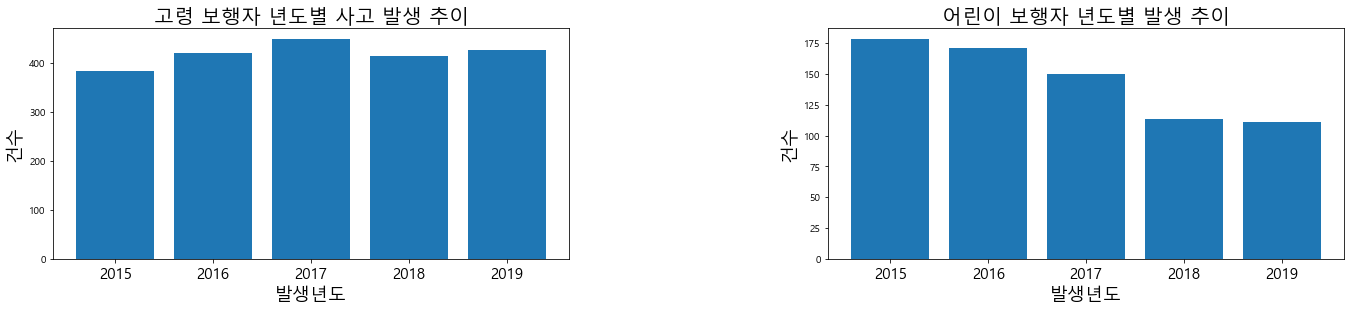

In [24]:
plt.subplot(121)
plt.bar(index, 강원피고령_빈도)
plt.title('고령 보행자 년도별 사고 발생 추이', fontsize=20)
plt.xlabel('발생년도', fontsize=18)
plt.ylabel('건수', fontsize=18)
plt.xticks(index, label, fontsize=15)

plt.subplot(122)
plt.bar(index, 강원피어린_빈도)
plt.title('어린이 보행자 년도별 발생 추이', fontsize=20)
plt.xlabel('발생년도', fontsize=18)
plt.ylabel('건수', fontsize=18)
plt.xticks(index, label, fontsize=15)

plt.subplots_adjust(left=0.01, bottom=0.1,  right=3, top=0.9, wspace=0.5, hspace=0.35)
plt.show()

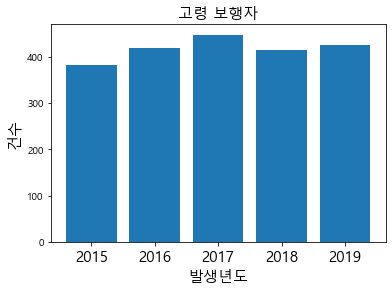

In [33]:
plt.bar(index, 강원피고령_빈도)
plt.title('고령 보행자', fontsize=15)
plt.xlabel('발생년도', fontsize=15)
plt.ylabel('건수', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.savefig('강원 고령 보행자 추세.png', dpi = 300)

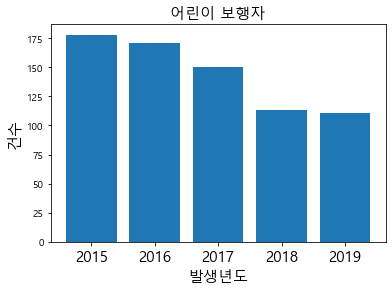

In [34]:
plt.bar(index, 강원피어린_빈도)
plt.title('어린이 보행자', fontsize=15)
plt.xlabel('발생년도', fontsize=15)
plt.ylabel('건수', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.savefig('강원 어린이 보행자 추세.png', dpi = 300)

In [71]:
강원피고령_요일별 = 강원피어린.groupby('요일').빈도계산용.sum()
강원피고령_요일별

요일
금    143
목     94
수    103
월    105
일     58
토    110
화    110
Name: 빈도계산용, dtype: int64

In [75]:
강원피고령_요일별 = pd.DataFrame({'요일':['월','화','수','목','금','토','일'],'건수':[105,110,103,94,143,110,58]})

In [68]:
import seaborn as sns

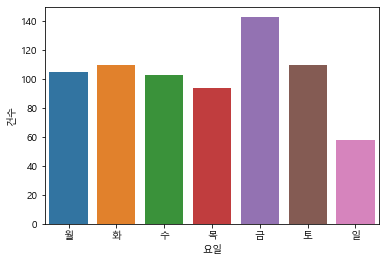

<Figure size 432x288 with 0 Axes>

In [81]:
sns.barplot(data=강원피고령_요일별, x='요일',y='건수')
plt.show()
plt.savefig('요일별 빈도.png')

In [83]:
강원피어린_보호 = 강원피어린.groupby('어린이보호구역_여부').빈도계산용.sum()

In [84]:
강원피어린_보호

어린이보호구역_여부
아니오    669
예       54
Name: 빈도계산용, dtype: int64

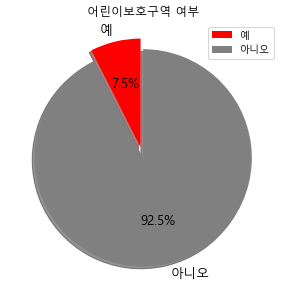

In [120]:
labels = ['예','아니오']
freq = [54, 669]
colors = ['red','grey']
plt.figure(figsize=(5,5))
plt.pie(freq, explode = (0.1,0),
        labels = labels, autopct='%1.1f%%',
       shadow = True, startangle = 90,
       textprops = {'fontsize':13}, colors = colors)
plt.title('어린이보호구역 여부')
plt.legend(labels=labels, loc='upper right')
plt.savefig('어린이 여부.png')

In [87]:
강원피고령_보호 = 강원피고령.groupby('노인보호구역_여부').빈도계산용.sum()
강원피고령_보호

노인보호구역_여부
아니오    2091
예         1
Name: 빈도계산용, dtype: int64

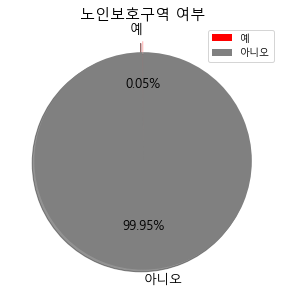

In [127]:
labels = ['예','아니오']
freq = [1, 2091]
colors = ['red','grey']
plt.figure(figsize=(5,5))
plt.pie(freq, explode = (0.1,0),
        labels = labels, autopct='%1.2f%%',
       shadow = True, startangle = 90,
       textprops = {'fontsize':13}, colors = colors)
plt.legend(labels=labels, loc='upper right')
plt.title('노인보호구역 여부', fontsize=15)
plt.savefig('노인보호구역 여부.png')

In [131]:
강원피고령.신체상해정도피해자.unique()
강원피고령_상해 = 강원피고령.groupby('신체상해정도피해자').빈도계산용.sum()
강원피고령_상해

신체상해정도피해자
경상       667
부상신고      64
사망       190
상해없음       2
중상      1169
Name: 빈도계산용, dtype: int64

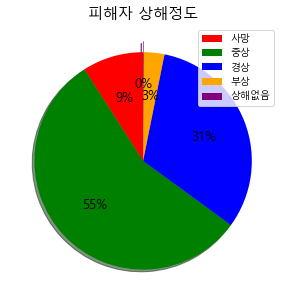

In [146]:
labels = ['사망','중상','경상','부상','상해없음']
freq = [190, 1169, 667, 64, 2]
colors = ['red','green','blue','orange','purple']
plt.figure(figsize=(5,5))
plt.pie(freq, explode = (0,0,0,0,0.1),
        autopct='%1d%%',
       shadow = True, startangle = 90,
       textprops = {'fontsize':13}, colors=colors)
plt.legend(labels=labels, loc='upper right')
plt.title('피해자 상해정도', fontsize=15)
plt.savefig('피해자 상해정도.png')